In [1]:
import visLib as vb
import random as rd
randStroke = rd.randint(20,200)
randTra = rd.randint(1,200)
datas = vb.loadData(randStroke)
print("total GPS POINTS in the trajectory: "+str(randStroke))
print("random trajectory number: "+ str(randTra))

total GPS POINTS in the trajectory: 115
random trajectory number: 98


In [2]:
trajectory = vb.createLineList(randTra,datas)
trajectory[:10]

['-8.578827',
 ' 41.165685',
 ' -8.578161',
 ' 41.166036',
 ' -8.578242',
 ' 41.165262',
 ' -8.579754',
 ' 41.164119',
 ' -8.581779',
 ' 41.164479']

In [3]:
finalRect = vb.getMiniRect(trajectory)
finalRect

0

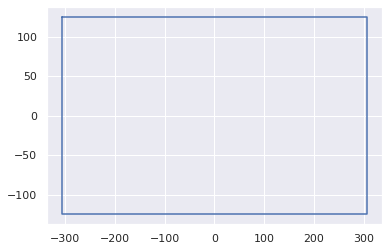

In [4]:
angle = vb.plotRightRect(finalRect)
angle

[0.03053374915787736, 0.012503389141995001, 1.101872495320546]
1.101872495320546


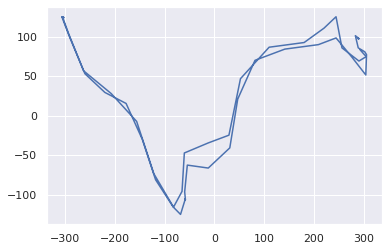

In [5]:
x,y = vb.plotRightPlot(trajectory,finalRect,angle)
#print(x)
#print(y)

In [6]:
stroke = vb.getStroke(x,y)
stroke[:10]

[[292.34471809554657, 83.26742341976394],
 [304.62660686219544, 74.55777312123806],
 [290.0854720777286, 69.00707954476955],
 [256.0268325237807, 85.6517865633173],
 [244.14660453501227, 125.03389141989653],
 [219.99251037688526, 110.5775248154835],
 [180.16055016818675, 92.41595698857502],
 [109.91569002361572, 86.49085586947382],
 [52.40764711101974, 46.66214009355559],
 [29.27873472118912, -24.782511292388925]]

In [7]:
from collections import deque
HER_GRID = 20
VER_GRID = 20
HER_LEN = 1800
VER_LEN = 1200

In [10]:
import numpy as np

def findDirection(dx,dy):
    
    if dx >= 0 and dy >= 0:
        if dx >= dy:
            return [[1,0],[0,1],[0,-1],[-1,0]]
        else:
            return [[0,1],[1,0],[-1,0],[0,-1]]
    elif dx<0 and dy<0:
        if dx >= dy:
            return [[-1,0],[0,-1],[0,1],[1,0]]
        else:
            return [[0,-1],[-1,0],[1,0],[0,1]]
    elif dx>=0 and dy <0:
        if abs(dx) >= abs(dy):
            return [[1,0],[0,-1],[0,1],[-1,0]]
        else:
            return [[0,-1],[1,0],[-1,0],[0,1]]
    else:
        if abs(dx) >= abs(dy):
            return [[-1,0],[0,1],[0,-1],[1,0]]
        else:
            return [[0,1],[-1,0],[1,0],[0,-1]]
            
def onTrajectory(p1,p2, cur):
    x1 = p1[0]
    x2 = p2[0]
    y1 = p1[1]
    y2 = p2[1]
    x0 = cur[0]
    y0 = cur[1]
    if x1==x2 and y1 == y2:
        return (x0-x1)**2+(y0-y1)**2 <=3
    dis = abs((x2-x1)*(y1-y0) - (x1-x0)*(y2-y1)) / np.sqrt(np.square(x2-x1) + np.square(y2-y1))
    return dis<=1.5
    
    
def getGridlizedTrajectory(strokes):
    hhalf = HER_LEN//2
    vhalf = VER_LEN//2
    gridTrajectory = [[round((strokes[0][0]+hhalf)//HER_GRID),round(-((strokes[0][1]-vhalf)//VER_GRID))]]
    ret=[]
    visited={}
    prePoint = gridTrajectory[-1]
    ret.append(prePoint)
    for i in range(1,len(strokes)):
        prePoint = gridTrajectory[-1]
        curPoint = [round((strokes[i][0]+hhalf)//HER_GRID),round(-((strokes[i][1]-vhalf)//VER_GRID))]
        gridTrajectory.append(curPoint)
        xmin= min(prePoint[0],curPoint[0])
        xmax = max(prePoint[0],curPoint[0])
        ymin= min(prePoint[1],curPoint[1])
        ymax = max(prePoint[1],curPoint[1])
        
        dx = curPoint[0] - prePoint[0]
        dy = curPoint[1] - prePoint[1]

        direction = findDirection(dx,dy)
        nodeQueue = deque()
        nodeQueue.append((prePoint[0],prePoint[1]))
        while nodeQueue:
            curNode = nodeQueue.popleft()
            visited[curNode]=1
            for d in direction:
                nextNode = (curNode[0]+d[0],curNode[1]+d[1])
                if nextNode not in visited and xmin<=nextNode[0]<=xmax and ymin<=nextNode[1]<=ymax:
                    visited[nextNode]=1
                    if onTrajectory(prePoint,curPoint,nextNode):
                        nodeQueue.append(nextNode)
                        ret.append([nextNode[0],nextNode[1]])
    return ret
            
gridTrajectory =    getGridlizedTrajectory(stroke)
print(gridTrajectory)
                

[[59, 26], [60, 26], [59, 27], [60, 27], [58, 27], [58, 26], [57, 27], [57, 26], [57, 25], [57, 24], [56, 24], [55, 24], [56, 25], [55, 25], [54, 25], [55, 26], [54, 26], [53, 26], [52, 26], [51, 26], [50, 26], [49, 26], [50, 27], [48, 26], [49, 27], [48, 27], [49, 28], [47, 27], [48, 28], [47, 28], [47, 29], [46, 28], [47, 30], [46, 29], [47, 31], [46, 30], [47, 32], [46, 31], [46, 32], [45, 32], [44, 32], [43, 32], [44, 33], [42, 32], [43, 33], [41, 32], [42, 33], [41, 33], [41, 34], [41, 35], [40, 35], [41, 36], [40, 36], [39, 36], [38, 36], [39, 35], [38, 35], [39, 34], [38, 34], [40, 34], [37, 34], [38, 33], [37, 33], [38, 32], [37, 32], [38, 31], [37, 31], [37, 30], [36, 31], [36, 30], [35, 31], [36, 29], [35, 30], [35, 29], [34, 30], [34, 29], [34, 28], [33, 29], [33, 28], [32, 29], [32, 28], [31, 29], [31, 28], [30, 28], [31, 27], [30, 27], [31, 26], [30, 26], [31, 25], [30, 25], [29, 25], [30, 24], [29, 24], [40, 37], [41, 37], [42, 37], [42, 36], [42, 35], [42, 34], [43, 34],

In [24]:
#from collections import deque
import numpy as np
import visLib as vb
import random as rd
import os
import sys


COL= HER_LEN//HER_GRID
questions = []
answers = []



def grid_anchors(rowCells,colCells,row=5,col=8):
    st_w=colCells//(col+1)
    st_h=rowCells//(row+1)
    #print(st_w,st_h)
    ini_w=0
    ini_h=0
    anchors = []
    for i in range(row):
        ini_h+=st_h
        ini_w=0
        for j in range(col):
            ini_w+=st_w
            anchors.append([ini_w,ini_h])
    return anchors
    

def to1DTraj(gridTrajectory, col):
    ret=[]
    for point in gridTrajectory:
        ret.append(point[1]*col+point[0]+1)
        #print("X:{} Y:{}".format(point[0],point[1]))
    return ret




colmax = list(map(max, zip(*gridTrajectory))) 
colmin = list(map(min, zip(*gridTrajectory))) 
#print(colmax,colmin)
if min(colmin)>=0 and colmax[0]<=HER_LEN//HER_GRID and colmax[1]<= VER_LEN//VER_GRID:
    anchors = grid_anchors(60,90)
    gridTraj1D = to1DTraj(gridTrajectory, COL)
    gridAnchor1D = to1DTraj(anchors,COL)
    cmd = "./experiment/getAnswer.o "
    cmd += str(HER_GRID)+" "
    cmd += str(VER_GRID)+" "
    cmd += str(HER_LEN)+" "
    cmd += str(VER_LEN)+" "
    cmd += str(COL)+" "
    cmd += "1 "
    cmd += str(len(anchors))+ " "
    for anchor in gridAnchor1D:
        cmd+=str(anchor)
        cmd+=" "
    cmd += str(len(gridTraj1D))+ " "
    for traj1D in gridTraj1D:
        #print(traj1D)
        #print("X:{} Y:{}".format((traj1D-1)%COL,(traj1D-1)//COL))
        cmd+=str(traj1D)
        cmd+=" "

    os.system(cmd)


            


In [16]:
%gui tk
import tkinter as tk
import time

ANCHORS=[]

class myTk():
    def __init__(self,root):
        self.root = root
        self.canvasSize = [HER_LEN,VER_LEN]
        #self.gridStep=20
        self.c = tk.Canvas(root, height=self.canvasSize[1], width=self.canvasSize[0], bg='white')
        self.c.pack()
        self.button = tk.Button(master=root, text="Quit", command=self._quit)
        self.button.pack(side=tk.BOTTOM)
        
        self.create_grid()
        ANCHORS = self.create_grid_anchors()
        self.plot_trajectory(gridTrajectory)
        
    def allButtons(self,root):
        self.allButtonsFrame = tk.Frame(root)
        
    
    
    def create_grid(self,event=None):
        w = self.canvasSize[0] # Get current width of canvas
        h = self.canvasSize[1] # Get current height of canvas
        self.c.delete('grid_line') # Will only remove the grid_line

        # Creates all vertical lines at intevals of 100
        for i in range(0, w, HER_GRID):
            self.c.create_line([(i, 0), (i, h)], tag='grid_line')

        # Creates all horizontal lines at intevals of 100
        for i in range(0, h, VER_GRID):
            self.c.create_line([(0, i), (w, i)], tag='grid_line')

    def create_grid_anchors(self, row=5,col=8):
        w = self.canvasSize[0] # Get current width of canvas
        h = self.canvasSize[1] # Get current height of canvas
        st_w=w//(col+1)
        st_h=h//(row+1)
        print(st_w,st_h)
        ini_w=0
        ini_h=0
        anchors = []
        for i in range(row):
            ini_h+=st_h
            ini_w=0
            for j in range(col):
                ini_w+=st_w
                self.c.create_rectangle(ini_w, ini_h, ini_w+HER_GRID, ini_h+VER_GRID,fill="red",tag='anchors')
                anchors.append([ini_w//st_w,ini_h//st_h])
        return anchors
                
                
    def plot_trajectory(self, gridTrajectory):
        for grid in gridTrajectory:
            time.sleep(0.1)
            self.root.update()
            ini_w = grid[0]*HER_GRID
            ini_h = grid[1]*VER_GRID
            self.c.create_rectangle(ini_w, ini_h, ini_w+HER_GRID, ini_h+VER_GRID,fill="green",tag='trajectory')

    def _quit(self):
        root.quit()     # stops mainloop
        root.destroy()  # this is necessary on Windows to prevent
                        # Fatal Python Error: PyEval_RestoreThread: NULL tstate


root = tk.Tk()
my_gui = myTk(root)
root.mainloop()



200 200


In [28]:
#create questions
from collections import deque
import numpy as np
import visLib as vb
import random as rd
import os
import sys

HER_GRID = 20
VER_GRID = 20
HER_LEN = 1800
VER_LEN = 1200

COL= HER_LEN//HER_GRID
questions = []
answers = []
questionStrokeRange = [193,195]
datas=[]

def findDirection(dx,dy):
    
    if dx >= 0 and dy >= 0:
        if dx >= dy:
            return [[1,0],[0,1],[0,-1],[-1,0]]
        else:
            return [[0,1],[1,0],[-1,0],[0,-1]]
    elif dx<0 and dy<0:
        if dx >= dy:
            return [[-1,0],[0,-1],[0,1],[1,0]]
        else:
            return [[0,-1],[-1,0],[1,0],[0,1]]
    elif dx>=0 and dy <0:
        if abs(dx) >= abs(dy):
            return [[1,0],[0,-1],[0,1],[-1,0]]
        else:
            return [[0,-1],[1,0],[-1,0],[0,1]]
    else:
        if abs(dx) >= abs(dy):
            return [[-1,0],[0,1],[0,-1],[1,0]]
        else:
            return [[0,1],[-1,0],[1,0],[0,-1]]
            
def onTrajectory(p1,p2, cur):
    x1 = p1[0]
    x2 = p2[0]
    y1 = p1[1]
    y2 = p2[1]
    x0 = cur[0]
    y0 = cur[1]
    if x1==x2 and y1 == y2:
        return (x0-x1)**2+(y0-y1)**2 <=3
    dis = abs((x2-x1)*(y1-y0) - (x1-x0)*(y2-y1)) / np.sqrt(np.square(x2-x1) + np.square(y2-y1))
    return dis<=1.5

def grid_anchors(rowCells,colCells,row=5,col=8):
    st_w=colCells//(col+1)
    st_h=rowCells//(row+1)
    #print(st_w,st_h)
    ini_w=0
    ini_h=0
    anchors = []
    for i in range(row):
        ini_h+=st_h
        ini_w=0
        for j in range(col):
            ini_w+=st_w
            anchors.append([ini_w,ini_h])
    return anchors
    
def getGridlizedTrajectory(strokes):
    hhalf = HER_LEN//2
    vhalf = VER_LEN//2
    gridTrajectory = [[round((strokes[0][0]+hhalf)//HER_GRID),round(-((strokes[0][1]-vhalf)//VER_GRID))]]
    ret=[]
    visited={}
    prePoint = gridTrajectory[-1]
    ret.append(prePoint)
    for i in range(1,len(strokes)):
        prePoint = gridTrajectory[-1]
        curPoint = [round((strokes[i][0]+hhalf)//HER_GRID),round(-((strokes[i][1]-vhalf)//VER_GRID))]
        gridTrajectory.append(curPoint)
        xmin= min(prePoint[0],curPoint[0])
        xmax = max(prePoint[0],curPoint[0])
        ymin= min(prePoint[1],curPoint[1])
        ymax = max(prePoint[1],curPoint[1])
        
        dx = curPoint[0] - prePoint[0]
        dy = curPoint[1] - prePoint[1]

        direction = findDirection(dx,dy)
        nodeQueue = deque()
        nodeQueue.append((prePoint[0],prePoint[1]))
        while nodeQueue:
            curNode = nodeQueue.popleft()
            visited[curNode]=1
            for d in direction:
                nextNode = (curNode[0]+d[0],curNode[1]+d[1])
                if nextNode not in visited and xmin<=nextNode[0]<=xmax and ymin<=nextNode[1]<=ymax:
                    visited[nextNode]=1
                    if onTrajectory(prePoint,curPoint,nextNode):
                        nodeQueue.append(nextNode)
                        ret.append([nextNode[0],nextNode[1]])
    return ret

def to1DTraj(gridTrajectory, col):
    ret=[]
    for point in gridTrajectory:
        ret.append(point[1]*col+point[0]+1)
        #print("X:{} Y:{}".format(point[0],point[1]))
    return ret

anchors = grid_anchors(60,90)
colmax = list(map(max, zip(*gridTrajectory))) 
colmin = list(map(min, zip(*gridTrajectory))) 
#print(colmax,colmin)
if min(colmin)>=0 and colmax[0]<=HER_LEN//HER_GRID and colmax[1]<= VER_LEN//VER_GRID:

    gridAnchor1D = to1DTraj(anchors,COL)
    cmd = "./experiment/getAnswer.o "
    cmd += str(HER_GRID)+" "
    cmd += str(VER_GRID)+" "
    cmd += str(HER_LEN)+" "
    cmd += str(VER_LEN)+" "
    cmd += str(COL)+" "
    cmd += str(len(anchors))+ " "
    for anchor in gridAnchor1D:
        cmd+=str(anchor)
        cmd+=" "
    cmd += str(len(gridTraj1D))+ " "
    #os.system(cmd)


for GPSPoints in range(questionStrokeRange[0],questionStrokeRange[1]):
    try:
        datas = vb.loadData(GPSPoints)
        dirName ='./dataExpect/'+str(GPSPoints)
        if not os.path.exists(dirName):
            os.makedirs(dirName)
    except:
        print("Fail to load data with {} GPS Points.".format(GPSPoints))
    '''
    for _n in range(1,len(datas)):
        try:
            trajectory = vb.createLineList(_n,datas)
            finalRect = vb.getMiniRect(trajectory)
            angle = vb.angleToRightRect(finalRect)
            x,y = vb.findRightPlot(trajectory,finalRect,angle)
            stroke = vb.getStroke(x,y)
            
            #print (anchors)
            gridTrajectory = getGridlizedTrajectory(stroke)
            gridTraj1D = to1DTraj(gridTrajectory, COL)
            f = open(dirName + "/TAS_"+str(_n), "w")
            f.write(" ".join(str(x) for x in gridTraj1D))
            f.close()

            
        except:
            print("fail in case with {} GPS Points and {}th trajectory.".format(GPSPoints,_n))
    '''
            


Fail to load data with 194 GPS Points.
